#Jonathan Halverson
#Wednesday, February 24, 2016
#Population parameters versus point estimates

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
population = norm.rvs(loc=75, scale=12, size=2**15)
print population.size, population.mean(), population.std()

32768 75.0218729443 12.0096299816


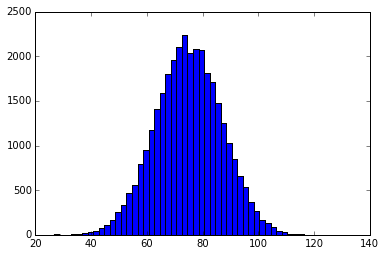

In [176]:
n, bins, patches = plt.hist(population, bins=50)

###Here we compute the mean and std of different size samples and plot them:

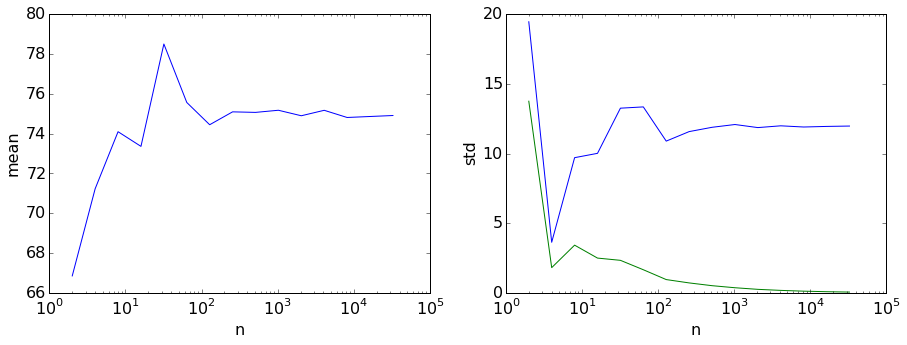

In [177]:
import numpy as np
from random import sample

def get_sample(p, n):
    s = np.array(sample(p, n))
    return s.mean(), s.std()

ns = [2**x for x in range(1, 16)]
pairs = [get_sample(population, n) for n in ns]
means, stds = zip(*pairs)
ses = [s / np.sqrt(n) for n, s in zip(ns, stds)]

fig = plt.figure(1, figsize=(15, 5))
plt.rcParams['font.size'] = 16

ax1 = fig.add_subplot(1, 2, 1)
plt.semilogx(ns, means)
plt.xlabel('n')
plt.ylabel('mean')

ax2 = fig.add_subplot(1, 2, 2)
plt.semilogx(ns, stds, ns, ses)
plt.xlabel('n')
plt.ylabel('std')

###Let's look at the variability in samples of the same size: 

74.9743360618 1.69701820906


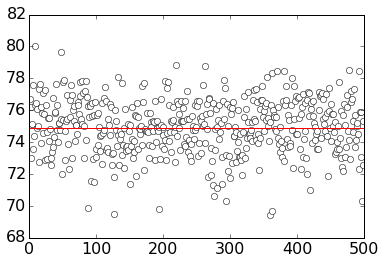

In [178]:
N = 500
pairs = [get_sample(population, n=50) for _ in range(N)]
means, stds = zip(*pairs)
print sum(means) / len(means), np.array(means).std()
plt.plot(range(N), means, 'wo')
plt.plot([0, N], [population.mean(), population.mean()], 'r-')

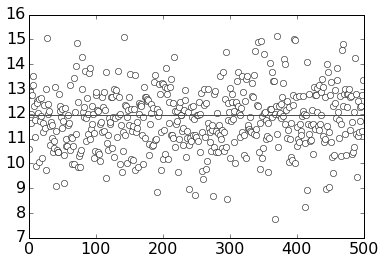

In [179]:
plt.plot(range(N), stds, 'wo')
plt.plot([0, N], [population.std(), population.std()], 'r-')

###The mean $\bar{x}$ and $\sigma_{\bar{x}}$ are printed out above. The quantity $\sigma_{\bar{x}}$ provides a measure of the width of the distribution. The standard error in the point estimate of the population mean is $\sigma_{\bar{x}}/\sqrt{n}$.

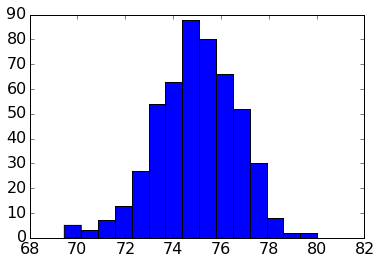

In [180]:
n, bins, patches = plt.hist(means, bins=15)

###It is useful to think of a particular point estimate as being drawn from such a distribution. Note that the std of the population divided by the square root of the sample size is equal to the std of the sampling distribution (this is expected from the CLT):

In [181]:
population.std() / np.sqrt(50), np.array(means).std()

(1.6924795600105917, 1.6970182090597328)

###In general we won't have the population std, so we use the std of the sample instead. So the standard error of the sample mean (point estimate) is the standard deviation of the samples divided by the square root of the sample size. 

#Confidence intervals 

###Here we construct a 95% confidence interval based on a single sample. We then carry out a numerical experiment to see if 95 of 100 means capture the population mean. 

In [182]:
x_bar, sigma = get_sample(population, n=100)
# lo = x_bar - 1.96 * sigma / np.sqrt(100)
# hi = x_bar + 1.96 * sigma / np.sqrt(100)
lo, hi = norm.interval(0.95, loc=x_bar, scale=sigma/np.sqrt(100))
print lo, hi

72.7967432947 77.1773541596


###We are 95% confident that the population mean is between 72.80 and 77.18. A confidence interval says nothing about the confidence of capturing individual observations.

###But what does “95% confident” mean? Suppose we took many samples and built a confidence interval from each sample using Equation (4.8). Then on average 95% of those intervals would contain the actual mean, μ. 

In [184]:
mu = population.mean()
inside = 0
trials = 1000
for _ in range(trials):
    x_bar, sigma = get_sample(population, n=100)
    lo, hi = norm.interval(0.95, loc=x_bar, scale=sigma/np.sqrt(100))
    if (lo < mu < hi): inside += 1
print float(inside) / trials

0.935


###Here's an aside on the disassembler: 

In [185]:
import dis
dis.dis(get_sample)

  5           0 LOAD_GLOBAL              0 (np)
              3 LOAD_ATTR                1 (array)
              6 LOAD_GLOBAL              2 (sample)
              9 LOAD_FAST                0 (p)
             12 LOAD_FAST                1 (n)
             15 CALL_FUNCTION            2
             18 CALL_FUNCTION            1
             21 STORE_FAST               2 (s)

  6          24 LOAD_FAST                2 (s)
             27 LOAD_ATTR                3 (mean)
             30 CALL_FUNCTION            0
             33 LOAD_FAST                2 (s)
             36 LOAD_ATTR                4 (std)
             39 CALL_FUNCTION            0
             42 BUILD_TUPLE              2
             45 RETURN_VALUE        
